# Modelling

### Load Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime 
import datetime as dt
import matplotlib.pyplot as plt

### Load Data

In [2]:
flights = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Data\cleaned\cleaned_flights_sample.csv', delimiter=',', low_memory=False)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-10-26,UA,WN,WN,4052,EV,N8541W,2542,12954,LGB,...,1.0,528.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-26,DL,UA,UA,2733,DL,N938FR,351,13930,ORD,...,1.0,404.0,NaN,NaN,18.0,0.0,0.0,NaN,NaN,NaN
2,2019-02-06,WN,NK,NK,5531,OO,N367CA,6266,10868,CAE,...,1.0,93.0,40.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
3,2019-11-11,DL,DL,DL,629,B6,N907WN,4607,14869,SLC,...,1.0,315.0,NaN,NaN,20.0,0.0,NaN,NaN,NaN,NaN
4,2019-03-25,WN,WN,WN,296,HA,N434YX,4535,14771,SFO,...,1.0,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fuel = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Data\cleaned\cleaned_fuel_consumption.csv', delimiter=',', low_memory=False)
fuel.head()

In [ ]:
passengers = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Data\cleaned\cleaned_passengers.csv', delimiter=',', low_memory=False)
flights.head()

In [ ]:
test = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Data\cleaned\flights_test.csv', delimiter=',', low_memory=False)
test.head()

In [ ]:
test = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Data\cleaned\flights_test.csv', delimiter=',', low_memory=False)
test.head()

In [4]:
weather = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Weather2\weather_table.csv', delimiter=',', low_memory=False)
weather.head()

,Unnamed: 0,date_time,location,totalSnow_cm,sunHour,cloudcover,precipMM,weather_type
0,0,2018-01-01,ABE,0.0,6.9,30,0.0,Sunny
1,1,2018-01-02,ABE,0.0,8.7,27,0.0,Sunny
2,2,2018-01-03,ABE,0.0,7.0,58,0.0,Cloudy
3,3,2018-01-04,ABE,0.2,3.5,99,4.7,Snowy
4,4,2018-01-05,ABE,0.0,5.2,71,0.0,Cloudy


### Data Cleanup for Modelling

In [3]:
#Add Date Featues to table
flights['year'] = pd.to_datetime(flights['fl_date']).dt.year
flights['quarter'] = pd.to_datetime(flights['fl_date']).dt.quarter
flights['month'] = pd.to_datetime(flights['fl_date']).dt.month
flights['day_of_month'] = pd.to_datetime(flights['fl_date']).dt.day
flights['day_of_week'] = pd.to_datetime(flights['fl_date']).dt.dayofweek

#Add time features to table
flights['crs_dep_hour'] = pd.to_datetime(flights['crs_dep_time'], format='%H%M', errors ='coerce').dt.hour
flights['crs_arr_hour'] = pd.to_datetime(flights['crs_dep_time'], format='%H%M', errors ='coerce').dt.hour

### Models

#### Base Model with Base Columns

In [80]:
# assign X and y

cols = ['fl_date', 'op_unique_carrier','tail_num', 'op_carrier_fl_num', 'origin', 'dest', 'crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'distance']

X = flights[cols]
y = flights['arr_delay']

In [81]:
# encode categorical columns
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

cat_vars = X.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    X[col] = label_encoder.fit_transform(X[col])

<ipython-input-81-e42afea9637d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])


In [82]:
# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xsc = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lr = xgb.XGBRegressor(objective = 'reg:squarederror')
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

# evaluate using MAE
MAE = mean_absolute_error(y_test, y_lr)
print(f"MAE: {MAE}")

# evaluate using R2
R2 = r2_score(y_test, y_lr)
print(f"R2: {R2}")

# evaluate with adjusted R2
adj_R2 = 1 - ((1 - R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"adj_R2: {adj_R2}")

MAE: 24.28410589482713
R2: -0.0030208911726141707
adj_R2: -0.00307661796098313


### Modelling

In [84]:
# Model with columns from paper PDF

# assign X and y
cols = ['year', 'quarter', 'month', 'day_of_month', 'day_of_week', 'op_unique_carrier', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time']
X = flights[cols]
y = flights['arr_delay']

# encode categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_vars = X.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    X[col] = label_encoder.fit_transform(X[col])

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lr = xgb.XGBRegressor(objective = 'reg:squarederror')
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)
# evaluate using MAE
MAE = mean_absolute_error(y_test, y_lr)
print(f"MAE: {MAE}")
# evaluate using R2
R2 = r2_score(y_test, y_lr)
print(f"R2: {R2}")
# evaluate with adjusted R2
adj_R2 = 1 - ((1 - R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"adj_R2: {adj_R2}")

<ipython-input-84-fdd202c86e9f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])


MAE: 24.300451615913854
R2: -0.001100305932267398
adj_R2: -0.0011614883631252404


In [91]:
# Model with only a few numeric columns

# assign X and y
cols = ['mkt_carrier_fl_num', 'dest_airport_id', 'crs_arr_time', 'distance', 'day_of_week', 'op_carrier_fl_num']
X = flights[cols]
y = flights['arr_delay']

# encode categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_vars = X.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    X[col] = label_encoder.fit_transform(X[col])

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lr = xgb.XGBRegressor(objective = 'reg:squarederror')
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)
# evaluate using MAE
MAE = mean_absolute_error(y_test, y_lr)
print(f"MAE: {MAE}")
# evaluate using R2
R2 = r2_score(y_test, y_lr)
print(f"R2: {R2}")
# evaluate with adjusted R2
adj_R2 = 1 - ((1 - R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"adj_R2: {adj_R2}")

MAE: 24.499586707680223
R2: -0.012256932828220712
adj_R2: -0.01229067603821754


In [ ]:
# Model with columns from paper PDF
# Removed negative 

# Filter to arr_delay greater than 0
flights2 = flights[flights['arr_delay'] > 0]

# assign X and y
cols = ['year', 'quarter', 'month', 'day_of_month', 'day_of_week', 'op_unique_carrier', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time']
X = flights2[cols]
y = flights2['arr_delay']

# encode categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_vars = X.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    X[col] = label_encoder.fit_transform(X[col])

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lr = xgb.XGBRegressor(objective = 'reg:squarederror')
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)
# evaluate using MAE
MAE = mean_absolute_error(y_test, y_lr)
print(f"MAE: {MAE}")
# evaluate using R2
R2 = r2_score(y_test, y_lr)
print(f"R2: {R2}")
# evaluate with adjusted R2
adj_R2 = 1 - ((1 - R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"adj_R2: {adj_R2}")

### Plotting target variable - arr_delay 
- This is a time-series / classification problem first off!
- Regression wont work on this EKG/noisy arr_delay predictor variable

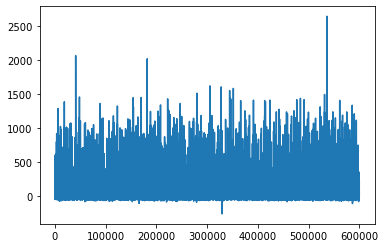

In [106]:
import matplotlib.pyplot as plt
import numpy as np

x = flights['arr_delay']

plt.plot(x)
plt.show()

# Classifier Modelling for Delay and No Delay

In [115]:
#Add column with delay or no delay
flights['arr_delay_flag'] = flights['arr_delay'].map(lambda x: 1 if x > 0 else 0)

In [116]:
flights

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,total_add_gtime,longest_add_gtime,year,quarter,month,day_of_month,day_of_week,crs_dep_hour,crs_arr_hour,arr_delay_flag
0,2018-10-26,UA,WN,WN,4052,EV,N8541W,2542,12954,LGB,...,NaN,NaN,2018,4,10,26,4,14.0,14.0,0
1,2018-03-26,DL,UA,UA,2733,DL,N938FR,351,13930,ORD,...,NaN,NaN,2018,1,3,26,0,11.0,11.0,0
2,2019-02-06,WN,NK,NK,5531,OO,N367CA,6266,10868,CAE,...,NaN,NaN,2019,1,2,6,2,17.0,17.0,1
3,2019-11-11,DL,DL,DL,629,B6,N907WN,4607,14869,SLC,...,NaN,NaN,2019,4,11,11,0,17.0,17.0,0
4,2019-03-25,WN,WN,WN,296,HA,N434YX,4535,14771,SFO,...,NaN,NaN,2019,1,3,25,0,14.0,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,2018-01-28,DL,DL,DL,1140,AA,N200NV,295,13930,ORD,...,NaN,NaN,2018,1,1,28,6,10.0,10.0,1
599996,2019-04-24,AA,AS,AS,3827,WN,N562JB,181,14893,SMF,...,NaN,NaN,2019,2,4,24,2,16.0,16.0,1
599997,2018-09-03,WN,AA_CODESHARE,AA,1570,AA,N7863A,4858,12278,ICT,...,NaN,NaN,2018,3,9,3,0,16.0,16.0,1
599998,2018-04-18,AS,UA,UA,5390,9E,N509JB,494,14100,PHL,...,NaN,NaN,2018,2,4,18,2,17.0,17.0,0


In [125]:
# Model with columns from paper PDF
# Classifier

# assign X and y
cols = ['year', 'quarter', 'month', 'day_of_month', 'day_of_week', 'op_unique_carrier', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time']
X = flights[cols]
y = flights['arr_delay_flag']

# encode categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_vars = X.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    X[col] = label_encoder.fit_transform(X[col])

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

#Evaluate
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import average_precision_score,roc_auc_score, confusion_matrix, plot_confusion_matrix, precision_score
lr = xgb.XGBClassifier(objective = 'reg:squarederror')
print(classification_report(y_test, y_lr))
print("Accuracy:", accuracy_score(y_test, y_lr))
print("F1 Score:", f1_score(y_test, y_lr))
print("Recall:", recall_score(y_test, y_lr))
print("Precision:", precision_score(y_test, y_lr))
print("AUC Score:", roc_auc_score(y_test, y_lr))

<ipython-input-125-3e695e83ff81>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\Ryan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.64      0.98      0.77    114379
           1       0.46      0.02      0.04     65621

    accuracy                           0.63    180000
   macro avg       0.55      0.50      0.41    180000
weighted avg       0.57      0.63      0.51    180000

Accuracy: 0.6338888888888888
F1 Score: 0.04368016253083732
Recall: 0.02293473125981012
Precision: 0.45758589236850106
AUC Score: 0.5036687312652053


# Load Rebalanced Flights Dataset - equal delay and no delay

In [126]:
#Load balanced data
#Even re-sample of delay and no delay from orig dataset
flights = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Data\cleaned\cleaned_balanced_sample.csv', delimiter=',', low_memory=False)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-08-27,HA,UA,UA,1155,WN,N900PC,1730,11193,CVG,...,1.0,708.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-14,AS,AA_CODESHARE,AA,4894,C5,N8665D,5648,11298,DFW,...,1.0,844.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-05,AS,WN,WN,5503,OH,N575NN,5073,10821,BWI,...,1.0,763.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-12,AA,AA,AA,1246,UA,N553AS,589,12197,HPN,...,1.0,1041.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-02-25,VX,UA_CODESHARE,UA,334,AA,N903JB,283,11298,DFW,...,1.0,296.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
#Add Date Featues to table
flights['year'] = pd.to_datetime(flights['fl_date']).dt.year
flights['quarter'] = pd.to_datetime(flights['fl_date']).dt.quarter
flights['month'] = pd.to_datetime(flights['fl_date']).dt.month
flights['day_of_month'] = pd.to_datetime(flights['fl_date']).dt.day
flights['day_of_week'] = pd.to_datetime(flights['fl_date']).dt.dayofweek

#Add time features to table
flights['crs_dep_hour'] = pd.to_datetime(flights['crs_dep_time'], format='%H%M', errors ='coerce').dt.hour
flights['crs_arr_hour'] = pd.to_datetime(flights['crs_dep_time'], format='%H%M', errors ='coerce').dt.hour

In [128]:
#Add column with delay or no delay
flights['arr_delay_flag'] = flights['arr_delay'].map(lambda x: 1 if x > 0 else 0)

In [129]:
# Model with columns from paper PDF
# Classifier

# assign X and y
cols = ['year', 'quarter', 'month', 'day_of_month', 'day_of_week', 'op_unique_carrier', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time']
X = flights[cols]
y = flights['arr_delay_flag']

# encode categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_vars = X.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    X[col] = label_encoder.fit_transform(X[col])

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

#Evaluate
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import average_precision_score,roc_auc_score, confusion_matrix, plot_confusion_matrix, precision_score
lr = xgb.XGBClassifier(objective = 'reg:squarederror')
print(classification_report(y_test, y_lr))
print("Accuracy:", accuracy_score(y_test, y_lr))
print("F1 Score:", f1_score(y_test, y_lr))
print("Recall:", recall_score(y_test, y_lr))
print("Precision:", precision_score(y_test, y_lr))
print("AUC Score:", roc_auc_score(y_test, y_lr))

<ipython-input-129-3e695e83ff81>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\Ryan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.55      0.55      0.55     89797
           1       0.55      0.55      0.55     90203

    accuracy                           0.55    180000
   macro avg       0.55      0.55      0.55    180000
weighted avg       0.55      0.55      0.55    180000

Accuracy: 0.5503666666666667
F1 Score: 0.5525442844821866
Recall: 0.5539837921133444
Precision: 0.5511122384833412
AUC Score: 0.5503584895954319


# Models Classifier Iterations

In [130]:
# Model with columns from paper PDF
# Classifier
# Try Date

# assign X and y
cols = ['fl_date', 'op_unique_carrier', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time']
X = flights[cols]
y = flights['arr_delay_flag']

# encode categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_vars = X.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    X[col] = label_encoder.fit_transform(X[col])

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

#Evaluate
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import average_precision_score,roc_auc_score, confusion_matrix, plot_confusion_matrix, precision_score
lr = xgb.XGBClassifier(objective = 'reg:squarederror')
print(classification_report(y_test, y_lr))
print("Accuracy:", accuracy_score(y_test, y_lr))
print("F1 Score:", f1_score(y_test, y_lr))
print("Recall:", recall_score(y_test, y_lr))
print("Precision:", precision_score(y_test, y_lr))
print("AUC Score:", roc_auc_score(y_test, y_lr))

<ipython-input-130-28ea84e869f0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\Ryan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.55      0.57      0.56     89797
           1       0.56      0.55      0.55     90203

    accuracy                           0.56    180000
   macro avg       0.56      0.56      0.56    180000
weighted avg       0.56      0.56      0.56    180000

Accuracy: 0.5564944444444444
F1 Score: 0.5525243409583919
Recall: 0.5463898096515637
Precision: 0.5587981859410431
AUC Score: 0.5565172875334446


In [138]:
# XGB Model
# Classifier
# Updated features included

# assign X and y
cols = ['fl_date', 'op_unique_carrier','tail_num', 'op_carrier_fl_num', 'origin', 'dest', 'crs_dep_time', 
        'crs_arr_time', 'crs_elapsed_time', 'distance']
X = flights[cols]
y = flights['arr_delay_flag']

# encode categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_vars = X.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    X[col] = label_encoder.fit_transform(X[col])

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
lr = xgb.XGBClassifier(objective = 'reg:squarederror', feature_names=cols)
lr = lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)

#Evaluate
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import average_precision_score,roc_auc_score, confusion_matrix, plot_confusion_matrix, precision_score
print(classification_report(y_test, y_lr))
print("Accuracy:", accuracy_score(y_test, y_lr))
print("F1 Score:", f1_score(y_test, y_lr))
print("Recall:", recall_score(y_test, y_lr))
print("Precision:", precision_score(y_test, y_lr))
print("AUC Score:", roc_auc_score(y_test, y_lr))

<ipython-input-138-1d0103ec8cf4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\Ryan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { feature_names } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


              precision    recall  f1-score   support

           0       0.55      0.57      0.56     89797
           1       0.56      0.54      0.55     90203

    accuracy                           0.55    180000
   macro avg       0.55      0.55      0.55    180000
weighted avg       0.56      0.55      0.55    180000

Accuracy: 0.5549333333333333
F1 Score: 0.5496998448636373
Recall: 0.5420884006075186
Precision: 0.5575280770765635
AUC Score: 0.554962371289427


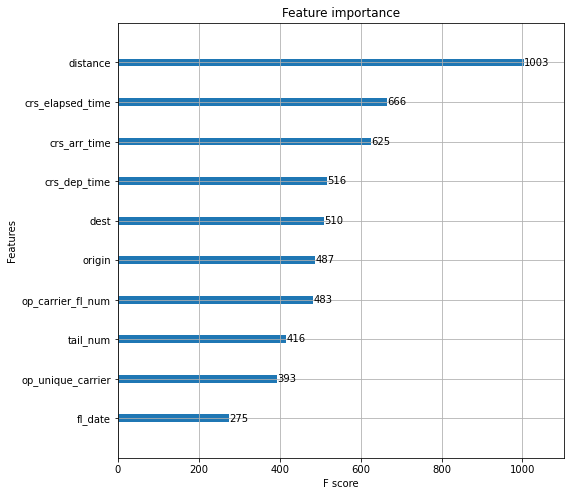

In [146]:
# Plot XGB Feature Importance
lr.feature_names = cols
xgb.plot_importance(lr).set_yticklabels(cols)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

In [179]:
# XGB Model
# Classifier
# Updated features included - Orig Date and Time features

# assign X and y
cols = ['fl_date', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin', 'dest', 'crs_dep_time', 
        'crs_arr_time', 'crs_elapsed_time', 'distance']
X = flights[cols]
y = flights['arr_delay_flag']

# encode categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_vars = X.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    X[col] = label_encoder.fit_transform(X[col])

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
model = xgb.XGBClassifier(objective = 'reg:squarederror')
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import average_precision_score,roc_auc_score, confusion_matrix, plot_confusion_matrix, precision_score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))

<ipython-input-179-1fcdabb45811>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\Ryan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.55      0.57      0.56     89797
           1       0.56      0.54      0.55     90203

    accuracy                           0.55    180000
   macro avg       0.55      0.55      0.55    180000
weighted avg       0.56      0.55      0.55    180000

Accuracy: 0.5549333333333333
F1 Score: 0.5496998448636373
Recall: 0.5420884006075186
Precision: 0.5575280770765635
AUC Score: 0.554962371289427


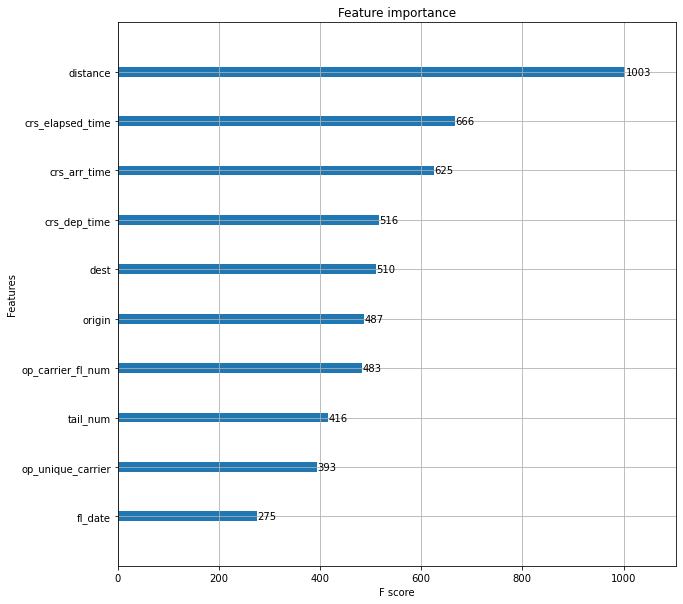

In [180]:
# Plot XGB Feature Importance
fig = xgb.plot_importance(model).set_yticklabels(cols)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

### Add Weather Data

In [182]:
#Add weather data to flights
flights = pd.merge(flights, weather, how='left', left_on=['fl_date', 'dest'], right_on = ['date_time', 'location'])

In [193]:
# Drop nas
flights2 = flights[flights['weather_type'].notna()]

In [196]:
# XGB Model
# Classifier
# Updated features included - Added all weather columns

# assign X and y
cols = ['fl_date', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin', 'dest', 'crs_dep_time', 
        'crs_arr_time', 'crs_elapsed_time', 'distance', 'totalSnow_cm', 'sunHour', 'cloudcover', 'precipMM', 'weather_type']
X = flights2[cols]
y = flights2['arr_delay_flag']

# encode categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_vars = X.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    X[col] = label_encoder.fit_transform(X[col])

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
model = xgb.XGBClassifier(objective = 'reg:squarederror')
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import average_precision_score,roc_auc_score, confusion_matrix, plot_confusion_matrix, precision_score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))

<ipython-input-196-30a1b0352ef7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\Ryan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.55      0.56      0.56     90082
           1       0.56      0.54      0.55     89912

    accuracy                           0.55    179994
   macro avg       0.55      0.55      0.55    179994
weighted avg       0.55      0.55      0.55    179994

Accuracy: 0.5546295987644032
F1 Score: 0.5498832090557901
Recall: 0.5445991636266572
Precision: 0.5552707974235689
AUC Score: 0.5546201341989329


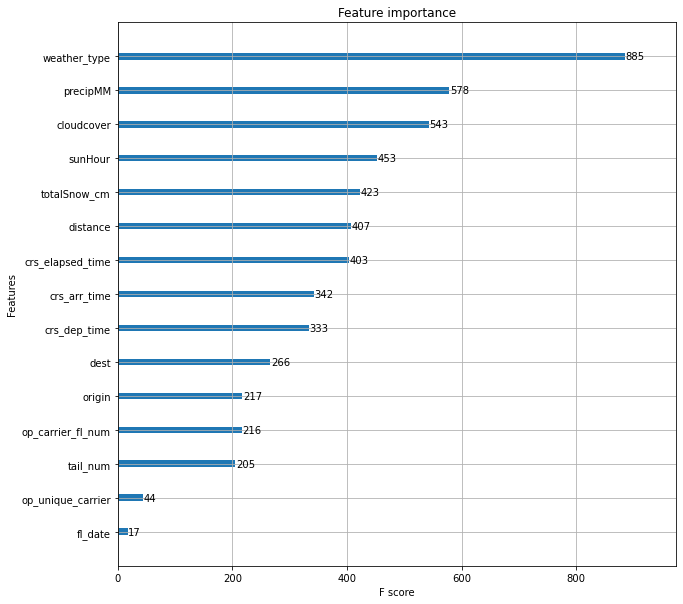

In [197]:
# Plot XGB Feature Importance
fig = xgb.plot_importance(model).set_yticklabels(cols)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [202]:
# XGB Model
# Classifier
# Updated features included - Added weather_type

# assign X and y
cols = ['fl_date', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin', 'dest', 'crs_dep_time', 
        'crs_arr_time', 'crs_elapsed_time', 'distance', 'weather_type']
X = flights2[cols]
y = flights2['arr_delay_flag']

# encode categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_vars = X.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    X[col] = label_encoder.fit_transform(X[col])

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
model = xgb.XGBClassifier(objective = 'reg:squarederror', n_estimators=300)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import average_precision_score,roc_auc_score, confusion_matrix, plot_confusion_matrix, precision_score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))

<ipython-input-202-afd3d4c96c85>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\Ryan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.55      0.56      0.55     90082
           1       0.55      0.54      0.55     89912

    accuracy                           0.55    179994
   macro avg       0.55      0.55      0.55    179994
weighted avg       0.55      0.55      0.55    179994

Accuracy: 0.5486627332022178
F1 Score: 0.5451399776035835
Recall: 0.5414293976332414
Precision: 0.5489017679956703
AUC Score: 0.5486559079371998


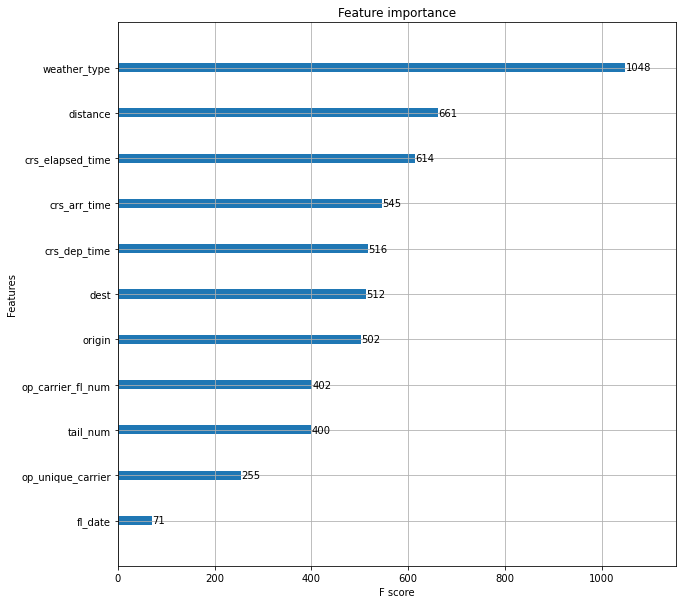

In [199]:
# Plot XGB Feature Importance
fig = xgb.plot_importance(model).set_yticklabels(cols)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

### Outlier Removal - Dropping top and botton 5% of arr_delay and dep_delay

In [208]:
# Find top 5% and bottom 5% of delays
high = np.percentile(flights2['arr_delay'], q=95.0)
print("95% cutoff", high)
low = np.percentile(flights2['arr_delay'], q=0.05)
print("5% cutoff", low)

high = np.percentile(flights2['dep_delay'], q=95.0)
print("95% cutoff", high)
low = np.percentile(flights2['dep_delay'], q=0.05)
print("5% cutoff", low)

95% cutoff 100.0
5% cutoff -51.0
95% cutoff 76.0
5% cutoff -23.0


In [216]:
#Filter out outliers
fl_df = flights2
f1_df = fl_df.loc[(fl_df['arr_delay'] <= 100)&(fl_df['arr_delay'] >= -51)&(fl_df['dep_delay'] <= 76)&(fl_df['dep_delay'] >= -23)]
flights3 = f1_df

In [219]:
# XGB Model
# Classifier
# Updated features included - Added weather_type and 95% and 5% cuttoff for delay outliers removed

# assign X and y
cols = ['fl_date', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin', 'dest', 'crs_dep_time', 
        'crs_arr_time', 'crs_elapsed_time', 'distance', 'weather_type']
X = flights3[cols]
y = flights3['arr_delay_flag']

# encode categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_vars = X.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    X[col] = label_encoder.fit_transform(X[col])

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
model = xgb.XGBClassifier(objective = 'reg:squarederror')
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import average_precision_score,roc_auc_score, confusion_matrix, plot_confusion_matrix, precision_score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))

<ipython-input-219-abe579a0bbdf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\Ryan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.56      0.68      0.62     85393
           1       0.54      0.40      0.46     77108

    accuracy                           0.55    162501
   macro avg       0.55      0.54      0.54    162501
weighted avg       0.55      0.55      0.54    162501

Accuracy: 0.5513442994196959
F1 Score: 0.460870658354963
Recall: 0.40413446075634174
Precision: 0.5361388778968739
AUC Score: 0.5442030026311658


#### Top/Bottom 10% Outliers removed

In [221]:
# Find top 5% and bottom 5% of delays
high = np.percentile(flights2['arr_delay'], q=90.0)
print("90% cutoff", high)
low = np.percentile(flights2['arr_delay'], q=0.1)
print("10% cutoff", low)

high = np.percentile(flights2['dep_delay'], q=90.0)
print("90% cutoff", high)
low = np.percentile(flights2['dep_delay'], q=0.1)
print("10% cutoff", low)

90% cutoff 57.0
10% cutoff -47.0
90% cutoff 38.0
10% cutoff -21.0


In [222]:
#Filter out outliers
fl_df = flights2
f1_df = fl_df.loc[(fl_df['arr_delay'] <= 57)&(fl_df['arr_delay'] >= -47)&(fl_df['dep_delay'] <= 38)&(fl_df['dep_delay'] >= -21)]
flights3 = f1_df

In [223]:
# XGB Model
# Classifier
# Updated features included - Added weather_type and 90% and 10% cuttoff for delay outliers removed

# assign X and y
cols = ['fl_date', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin', 'dest', 'crs_dep_time', 
        'crs_arr_time', 'crs_elapsed_time', 'distance', 'weather_type']
X = flights3[cols]
y = flights3['arr_delay_flag']

# encode categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_vars = X.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    X[col] = label_encoder.fit_transform(X[col])

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
model = xgb.XGBClassifier(objective = 'reg:squarederror')
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import average_precision_score,roc_auc_score, confusion_matrix, plot_confusion_matrix, precision_score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))

<ipython-input-223-c532f99d5308>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\Ryan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.57      0.83      0.68     81148
           1       0.51      0.22      0.31     64825

    accuracy                           0.56    145973
   macro avg       0.54      0.52      0.49    145973
weighted avg       0.54      0.56      0.51    145973

Accuracy: 0.5586992114980167
F1 Score: 0.30734822907034254
Recall: 0.22047049749325107
Precision: 0.5072222025055897
AUC Score: 0.5246816922818943


#### Arr_delay filter to [-250,250]

In [224]:
#Filter out outliers
fl_df = flights2
f1_df = fl_df.loc[(fl_df['arr_delay'] <= 250) & (fl_df['arr_delay'] >= -250)]
flights3 = f1_df

In [225]:
# XGB Model
# Classifier
# Updated features included - Added weather_type and 90% and 10% cuttoff for delay outliers removed

# assign X and y
cols = ['fl_date', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin', 'dest', 'crs_dep_time', 
        'crs_arr_time', 'crs_elapsed_time', 'distance', 'weather_type']
X = flights3[cols]
y = flights3['arr_delay_flag']

# encode categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_vars = X.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    X[col] = label_encoder.fit_transform(X[col])

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
model = xgb.XGBClassifier(objective = 'reg:squarederror')
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import average_precision_score,roc_auc_score, confusion_matrix, plot_confusion_matrix, precision_score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))

<ipython-input-225-c532f99d5308>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\Ryan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.56      0.58      0.57     90145
           1       0.55      0.53      0.54     88456

    accuracy                           0.55    178601
   macro avg       0.55      0.55      0.55    178601
weighted avg       0.55      0.55      0.55    178601

Accuracy: 0.5540450501396968
F1 Score: 0.5396229032519103
Recall: 0.5277086913267613
Precision: 0.552087522176227
AUC Score: 0.5537983248080919


### Basic to Prior model with weather_type added

In [227]:
# XGB Model
# Classifier
# Updated features included - Added weather_type

# assign X and y
cols = ['fl_date', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin', 'dest', 'crs_dep_time', 
        'crs_arr_time', 'crs_elapsed_time', 'distance', 'weather_type']
X = flights2[cols]
y = flights2['arr_delay_flag']

# encode categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_vars = X.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    X[col] = label_encoder.fit_transform(X[col])

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
model = xgb.XGBClassifier(objective = 'reg:squarederror')
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import average_precision_score,roc_auc_score, confusion_matrix, plot_confusion_matrix, precision_score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))

<ipython-input-227-8ca5e2c3964b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\Ryan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.56      0.56      0.56     90082
           1       0.56      0.55      0.55     89912

    accuracy                           0.56    179994
   macro avg       0.56      0.56      0.56    179994
weighted avg       0.56      0.56      0.56    179994

Accuracy: 0.5553629565429958
F1 Score: 0.5529787638102259
Recall: 0.5505494261055254
Precision: 0.5554296357801665
AUC Score: 0.5553584145691588


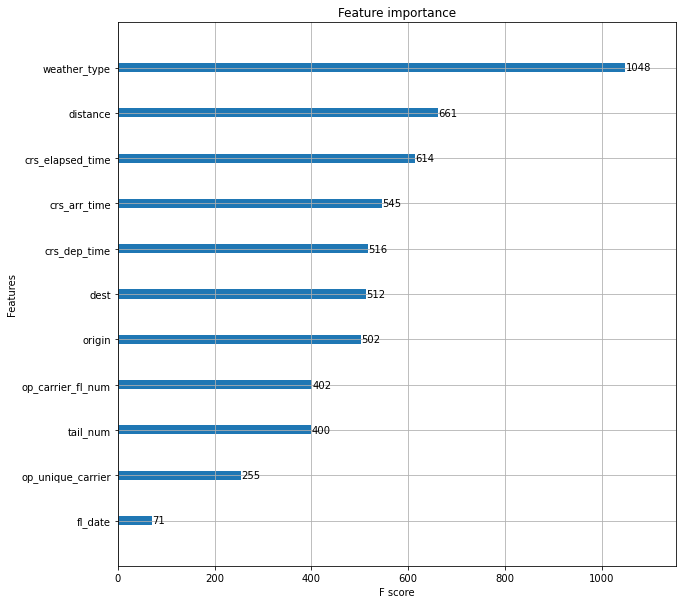

In [228]:
# Plot XGB Feature Importance
fig = xgb.plot_importance(model).set_yticklabels(cols)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

### Random Forest

In [232]:
# Double Check class balance
flights2['arr_delay_flag'].value_counts()

0    299991
1    299989
Name: arr_delay_flag, dtype: int64

In [234]:
# Random Forest
# Classifier
# Updated features included - Added weather_type

# assign X and y
cols = ['fl_date', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin', 'dest', 'crs_dep_time', 
        'crs_arr_time', 'crs_elapsed_time', 'distance', 'weather_type']
X = flights2[cols]
y = flights2['arr_delay_flag']

# encode categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_vars = X.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    X[col] = label_encoder.fit_transform(X[col])

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import average_precision_score,roc_auc_score, confusion_matrix, plot_confusion_matrix, precision_score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))

<ipython-input-234-718f95e77fe4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])


              precision    recall  f1-score   support

           0       0.52      0.55      0.54     90082
           1       0.52      0.49      0.51     89912

    accuracy                           0.52    179994
   macro avg       0.52      0.52      0.52    179994
weighted avg       0.52      0.52      0.52    179994

Accuracy: 0.5211895952087292
F1 Score: 0.5062928570201016
Recall: 0.4914805587685737
Precision: 0.5220257291703583
AUC Score: 0.5211615622154852


### Move back to XGBoost - Try One-Hot Encoding

In [242]:
flights4 = flights2

In [244]:
# XGB Model
# Classifier
# Updated features included - Added weather_type

# assign X and y
cols = ['fl_date', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin', 'dest', 'crs_dep_time', 
        'crs_arr_time', 'crs_elapsed_time', 'distance', 'weather_type']
X = flights4[cols]
y = flights4['arr_delay_flag']

# One Hot Encoding
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
cat_vars = X.select_dtypes(include= 'object').columns.tolist()
enc_df = pd.DataFrame(enc.fit_transform(X[[col]]).toarray())
flights4 = flights4.join(enc_df)

for col in cat_vars:
    X[col] = onehot_encoder.fit_transform(X[[col]]).toarray()

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
model = xgb.XGBClassifier(objective = 'reg:squarederror')
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import average_precision_score,roc_auc_score, confusion_matrix, plot_confusion_matrix, precision_score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))

<ipython-input-244-a215e58db7f0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = onehot_encoder.fit_transform(X[[col]]).toarray()
<ipython-input-244-a215e58db7f0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = onehot_encoder.fit_transform(X[[col]]).toarray()


MemoryError: Unable to allocate 28.7 GiB for an array with shape (599980, 6423) and data type float64

### XGBoost with One Hot Encoding

In [295]:
flights4 = flights2

In [308]:
# XGB Model
# Classifier
# Updated features included - Added weather_type
# Update features to lower number of categories in categorical variables

# assign X and y
cols = ['day_of_month', 'month', 'day_of_week', 'op_unique_carrier', 'op_carrier_fl_num', 'dest', 'origin', 'tail_num', 'weather_type', 'distance', 'crs_arr_time']      
# crs_dep_time', crs_dep_hour', 'crs_arr_hour''crs_arr_time', 'crs_elapsed_time', 'crs_dep_time', 'dest', 'tailnum', crs_arr_time', 'op_unique_carrier', 'crs_dep_hour', 'crs_arr_time', 'crs_elapsed_time']

X = flights4[cols]
y = flights4['arr_delay_flag']

# Onehot encoding
cat_vars = ['day_of_month', 'month', 'day_of_week', 'op_unique_carrier', 'op_carrier_fl_num', 'dest', 'origin', 'tail_num', 'weather_type']
#cat_vars = X.select_dtypes(include= 'object').columns.tolist()
X = pd.get_dummies(X, columns=cat_vars)
#X = dum_df

# Label Encoding
#from sklearn import preprocessing
#enc = preprocessing.OneHotEncoder()
#cat_vars = X.select_dtypes(include= 'object').columns.tolist()
#enc_df = pd.DataFrame(enc.fit_transform(X[cols]).toarray())
#flights4 = flights4.join(enc_df)

# make train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#Xsc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
model = xgb.XGBClassifier(objective = 'reg:squarederror')
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import average_precision_score,roc_auc_score, confusion_matrix, plot_confusion_matrix, precision_score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))

C:\Users\Ryan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.56      0.56      0.56     90082
           1       0.56      0.55      0.55     89912

    accuracy                           0.56    179994
   macro avg       0.56      0.56      0.56    179994
weighted avg       0.56      0.56      0.56    179994

Accuracy: 0.5553629565429958
F1 Score: 0.5529787638102259
Recall: 0.5505494261055254
Precision: 0.5554296357801665
AUC Score: 0.5553584145691588


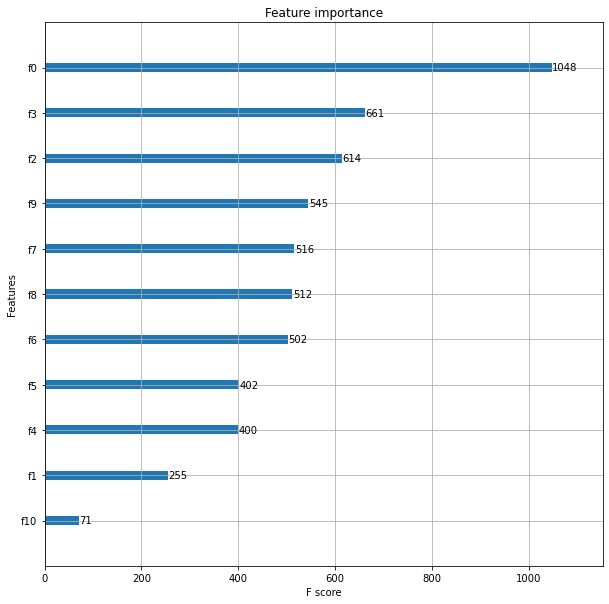

In [317]:
# Plot XGB Feature Importance
# .set_yticklabels(cols)
fig = xgb.plot_importance(model)
#fig.set_yticklabels(cols)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

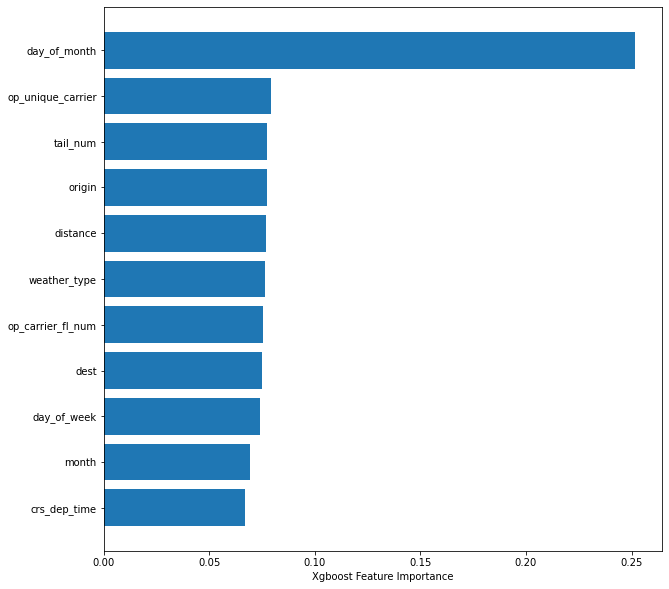

In [326]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(flights4[cols].columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.show()

# XGBoost with One Hot Encoding - Balanced Dataset - Cleaned Up Code

In [2]:
#Load balanced data
#Even re-sample of delay and no delay from orig dataset
flights = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Data\cleaned\cleaned_balanced_sample.csv', delimiter=',', low_memory=False)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-08-27,HA,UA,UA,1155,WN,N900PC,1730,11193,CVG,...,1.0,708.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-14,AS,AA_CODESHARE,AA,4894,C5,N8665D,5648,11298,DFW,...,1.0,844.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-05,AS,WN,WN,5503,OH,N575NN,5073,10821,BWI,...,1.0,763.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-12,AA,AA,AA,1246,UA,N553AS,589,12197,HPN,...,1.0,1041.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-02-25,VX,UA_CODESHARE,UA,334,AA,N903JB,283,11298,DFW,...,1.0,296.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Prep data for ML

#Add Date Featues to table
flights['year'] = pd.to_datetime(flights['fl_date']).dt.year
flights['quarter'] = pd.to_datetime(flights['fl_date']).dt.quarter
flights['month'] = pd.to_datetime(flights['fl_date']).dt.month
flights['day_of_month'] = pd.to_datetime(flights['fl_date']).dt.day
flights['day_of_week'] = pd.to_datetime(flights['fl_date']).dt.dayofweek

#Add time features to table
flights['crs_dep_hour'] = pd.to_datetime(flights['crs_dep_time'], format='%H%M', errors ='coerce').dt.hour
flights['crs_arr_hour'] = pd.to_datetime(flights['crs_dep_time'], format='%H%M', errors ='coerce').dt.hour

#Add column with delay or no delay
flights['arr_delay_flag'] = flights['arr_delay'].map(lambda x: 1 if x > 0 else 0)

#Import weather data
weather = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Weather2\weather_table.csv', delimiter=',', low_memory=False)

#Add weather data to flights
flights = pd.merge(flights, weather, how='left', left_on=['fl_date', 'dest'], right_on = ['date_time', 'location'])

# Drop nas
flights = flights[flights['weather_type'].notna()]

In [8]:
# XGB Classifier - Balanced Dataset - Onehot Encoding - Cleaned Up Version
# Weather Added

# Select Features and Assign X and y
cols = ['day_of_month', 'month', 'day_of_week', 'op_unique_carrier', 'origin', 'dest', 'weather_type', 'distance', 'crs_arr_time', 'crs_dep_time']      
#'tail_num' , 'crs_dest_time', 'op_carrier_fl_num'
# crs_dep_time', crs_dep_hour', 'crs_arr_hour''crs_arr_time', 'crs_elapsed_time', 'crs_dep_time', 'dest', 'tail_num', 
#crs_arr_time', 'op_unique_carrier', 'crs_dep_hour', 'crs_arr_time', 'crs_elapsed_time']
X = flights[cols]
y = flights['arr_delay_flag']

# Onehot encoding
cat_vars = ['day_of_month', 'month', 'day_of_week', 'op_unique_carrier', 'origin', 'dest', 'weather_type']
X = pd.get_dummies(X, columns=cat_vars)

# Make train-test split and scale if needed
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#Xsc = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

#Model
import xgboost as xgb
model = xgb.XGBClassifier(objective = 'reg:squarederror')
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import average_precision_score,roc_auc_score, confusion_matrix, plot_confusion_matrix, precision_score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))

C:\Users\Ryan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.55      0.51      0.53     90082
           1       0.54      0.58      0.56     89912

    accuracy                           0.54    179994
   macro avg       0.54      0.54      0.54    179994
weighted avg       0.54      0.54      0.54    179994

Accuracy: 0.5446514883829461
F1 Score: 0.5604890604890604
Recall: 0.5812349853189785
Precision: 0.5411730593985585
AUC Score: 0.5446860080121679


In [11]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(flights[cols].columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.show()

IndexError: index 416 is out of bounds for axis 0 with size 10

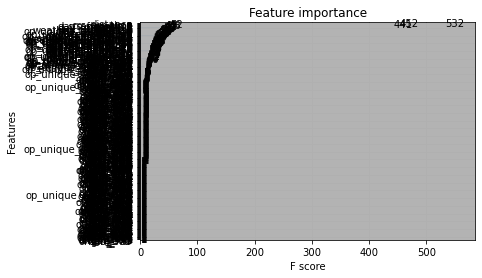

In [13]:
# Plot XGB Feature Importance
# .set_yticklabels(cols)
fig = xgb.plot_importance(model)
#fig.set_yticklabels(cols)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [14]:
import gc
gc.collect()

22